<a href="https://colab.research.google.com/github/NMNayan57/prediction/blob/main/Thermal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Relevant Libraries Import

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import os

#import shap
#%matplotlib inline
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
#from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score , recall_score, precision_score, f1_score


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier


In [ ]:
#Dataset Import
df = pd.read_csv("/content/hvac_data.csv")

In [ ]:
#data preprocessing Start

df.head()

,Air_temp,Relative_humidity,Outdoor_temp,Thermal_comfort
0,24.2,50.2,25.0,5
1,24.2,50.2,25.0,5
2,24.2,50.2,25.0,6
3,24.2,50.2,25.0,4
4,24.2,50.2,25.0,6


In [ ]:
df.describe()

,Air_temp,Relative_humidity,Outdoor_temp
count,99911.000000,97762.000000,79338.000000
mean,24.496358,47.548068,17.439813
std,3.782002,15.760944,9.936357
min,0.600000,0.000000,-18.400000
25%,22.300000,35.300000,10.000000
50%,23.900000,47.200000,17.100000
75%,26.400000,59.400000,25.000000
max,63.200000,100.000000,45.100000


In [ ]:
df['Thermal_comfort'].value_counts()


5      13325
6       6010
4       5918
3       4400
2       3404
3.5      699
1        602
2.7      438
4.3      362
4.5      271
5.2      240
3.4      208
1.8      147
2.6      116
5.1       90
1.7       58
1.5       26
           6
0.9        4
2.5        3
4.2        2
2.2        1
2.4        1
2.8        1
1.3        1
2.3        1
Na         1
Name: Thermal_comfort, dtype: int64

Replace Simillar Values to Unique Values

information about dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107583 entries, 0 to 107582
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Air_temp           99911 non-null  float64
 1   Relative_humidity  97762 non-null  float64
 2   Outdoor_temp       79338 non-null  float64
 3   Thermal_comfort    36335 non-null  object 
dtypes: float64(3), object(1)
memory usage: 3.3+ MB


Here we find class and Gender has object value so we need to convert them into Encoded label through label encoder

Heat map

<ipython-input-7-c402f486c940>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


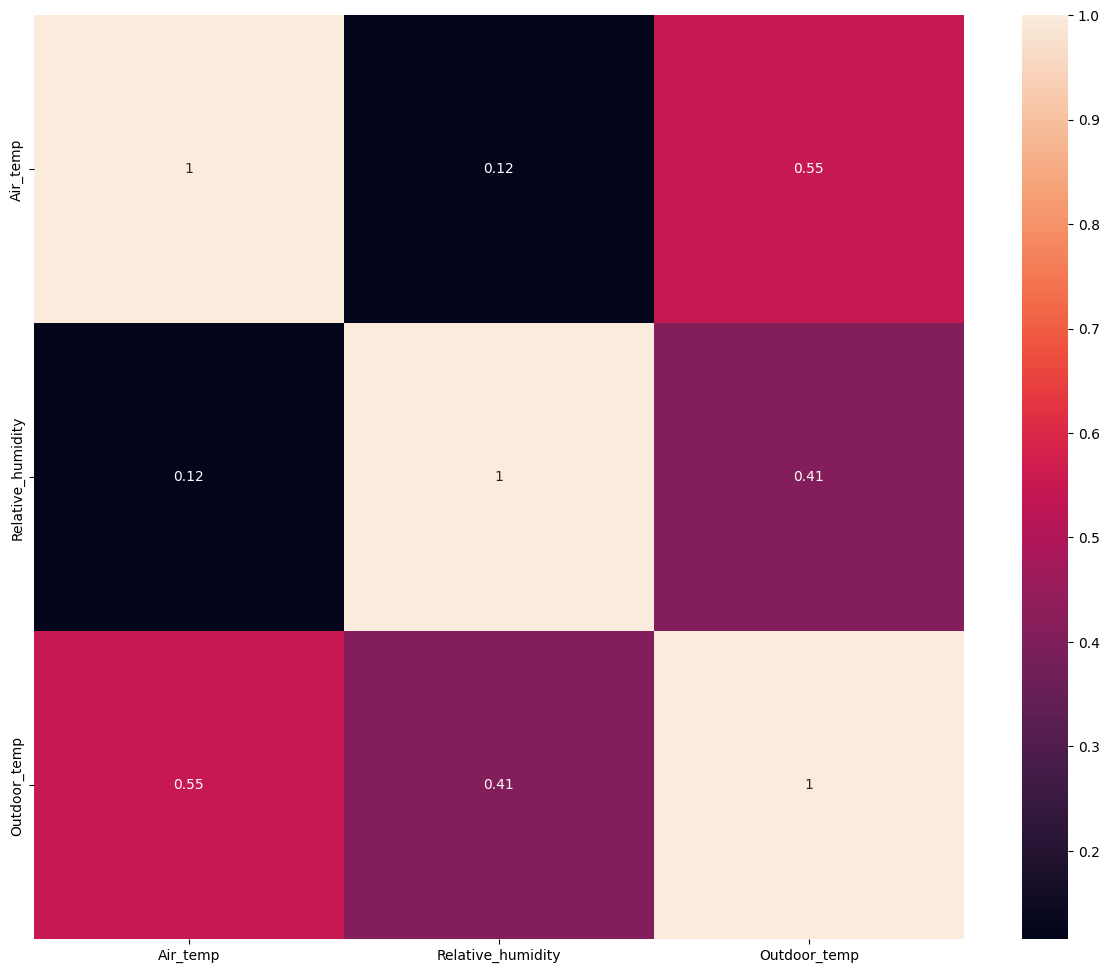

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
correlation_matrix = df.corr(method='pearson')

correlation_matrix

<ipython-input-8-fcb759b7b01b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


,Air_temp,Relative_humidity,Outdoor_temp
Air_temp,1.000000,0.115516,0.547662
Relative_humidity,0.115516,1.000000,0.409798
Outdoor_temp,0.547662,0.409798,1.000000


# **Label Encoder**

In [ ]:
df.Thermal_comfort= le.fit_transform(df.Thermal_comfort.values)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107583 entries, 0 to 107582
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Air_temp           99911 non-null   float64
 1   Relative_humidity  97762 non-null   float64
 2   Outdoor_temp       79338 non-null   float64
 3   Thermal_comfort    107583 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 3.3 MB


In [ ]:
df.head()

,Air_temp,Relative_humidity,Outdoor_temp,Thermal_comfort
0,24.2,50.2,25.0,22
1,24.2,50.2,25.0,22
2,24.2,50.2,25.0,25
3,24.2,50.2,25.0,18
4,24.2,50.2,25.0,25


Removing duplicated data points
 if find any



In [ ]:
print(f"There are {df.duplicated().sum()} duplicates data")


There are 48881 duplicates data


finding is null value avilable

In [ ]:
df.isnull().sum()


Air_temp              7672
Relative_humidity     9821
Outdoor_temp         28245
Thermal_comfort          0
dtype: int64

**Creating a test set**

Gaining further insight
**bold text**

**Rescaling or standardizing attributes**

In [ ]:
df = df.fillna(df.mean())

In [ ]:
X = df[['Air_temp', 'Relative_humidity', 'Outdoor_temp']]
y = df['Thermal_comfort']


In [ ]:
X.shape



(107583, 3)

In [ ]:
y.shape

(107583,)

In [ ]:
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import classification_report
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (86066, 3)
Number transactions y_train dataset:  (86066,)
Number transactions X_test dataset:  (21517, 3)
Number transactions y_test dataset:  (21517,)


In [ ]:

# logistic regression object
lr = LogisticRegression()

# train the model on train set
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

# print classification report
print(accuracy_score(y_test, predictions))

0.6586420039968397


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

mse= 32.862573778872516
msle= 0.11167512261028041
mae= 2.7516847144118604
rmse= 5.732588750195894


In [ ]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train.ravel())
predictions = DT.predict(X_test)

# print classification report
print(accuracy_score(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

0.7472231259004508
mse= 18.573732397639077
msle= 0.08866732741193903
mae= 1.819352140168239
rmse= 4.309725327400701


In [ ]:
# KNN classifier machine object
KNN =  KNeighborsClassifier()

# train the model on train set
KNN.fit(X_train, y_train.ravel())

predictions = KNN.predict(X_test)

# print classification report
print(accuracy_score(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

0.7392294464841753
mse= 18.916949388855322
msle= 0.08124689140380942
mae= 1.8674536413068736
rmse= 4.349361951925284


In [ ]:
# GNB classifier machine object
GNB =  GaussianNB()

# train the model on train set
GNB.fit(X_train, y_train.ravel())

predictions = GNB.predict(X_test)

# print classification report
print(accuracy_score(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

0.6396337779430218
mse= 56.31068457498722
msle= 0.6145545170896197
mae= 3.765534228749361
rmse= 7.5040445477747015


In [ ]:
# XGB classifier machine object
XGB = XGBClassifier()

# train the model on train set
XGB.fit(X_train, y_train.ravel())

predictions = XGB.predict(X_test)

# print classification report
print(accuracy_score(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

ValueError: ignored

In [ ]:
# MLP classifier machine object
MLP = MLPClassifier(random_state=1, max_iter=300)
# train the model on train set
MLP.fit(X_train, y_train.ravel())

predictions = MLP.predict(X_test)

# print classification report
print(accuracy_score(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

0.6938699632848445
mse= 25.62531951480225
msle= 0.09501858408090115
mae= 2.2888878561137704
rmse= 5.062145742153445


In [ ]:
# adaboost classifier machine object
adaboost =AdaBoostClassifier(random_state=96)
# train the model on train set
adaboost.fit(X_train, y_train.ravel())

predictions = adaboost.predict(X_test)

# print classification report
print(accuracy_score(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

0.35743830459636566
mse= 31.979783427057676
msle= 0.10931627133670134
mae= 3.2261467676720734
rmse= 5.655067057697696


In [ ]:
# random Forest classifier machine object
RF =RandomForestClassifier(max_depth=2, random_state=0)
# train the model on train set
RF.fit(X_train, y_train.ravel())

predictions = RF.predict(X_test)

# print classification report
print(accuracy_score(y_test, predictions))
#import result of mse
print("mse=",  metrics.mean_squared_error(y_test, predictions))
#import result of mae
print("msle=",  metrics.mean_squared_log_error(y_test, predictions))
#import result of mae
print("mae=", metrics.mean_absolute_error(y_test, predictions))

#import result of rmse
print("rmse=", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

0.661755820978761
mse= 32.93902495701074
msle= 0.11187364792938892
mae= 2.744574057721801
rmse= 5.739252996428258


In [ ]:
pip install shap

In [ ]:
import shap


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [ ]:
explainer = shap.TreeExplainer(XGB1)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value



In [ ]:
# Generate summary dot plot
shap.summary_plot(shap_values, X,title="SHAP summary plot")

In [ ]:
pip install explainerdashboard

In [ ]:
import explainerdashboard as expdb
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
from explainerdashboard import InlineExplainer
from explainerdashboard.custom import (ImportancesComposite,
                                       IndividualPredictionsComposite,
                                       WhatIfComposite,
                                       ShapDependenceComposite,
                                       ShapInteractionsComposite,
                                       DecisionTreesComposite)

In [ ]:
X_train = pd.DataFrame(X_train, columns = X.columns)

X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
# Create the explainer object
explainer = ClassifierExplainer(XGB1, X_test, y_test,model_output='logodds')


In [ ]:

ie = InlineExplainer(explainer)

In [ ]:
ie.shap.overview()
